## Visualizing blanks

Picking blanks to use for correction

Loading libraries and data

In [42]:
library(tidyverse)
theme_set(theme_bw())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [26]:
df <- read.csv('../Data/2_0_summary_stats_single_file/all_data.csv', header=T)

Adjustments for better graphing

In [27]:
df$Date <- as.factor(df$Date)
df$Date <- with(df, paste('0',df$Date,sep=""))

In [35]:
df$Analysis_Type_2 <- 'Absorption'
df$Analysis_Type_2[df$Analysis_Type=='c'] <- 'Attenuation'

In [30]:
df$Site_Date <- with(df, paste(Site,Date,sep="_"))

Looking at just calibration samples

In [36]:
cals <- df[df$Sample_Type=="cal",]

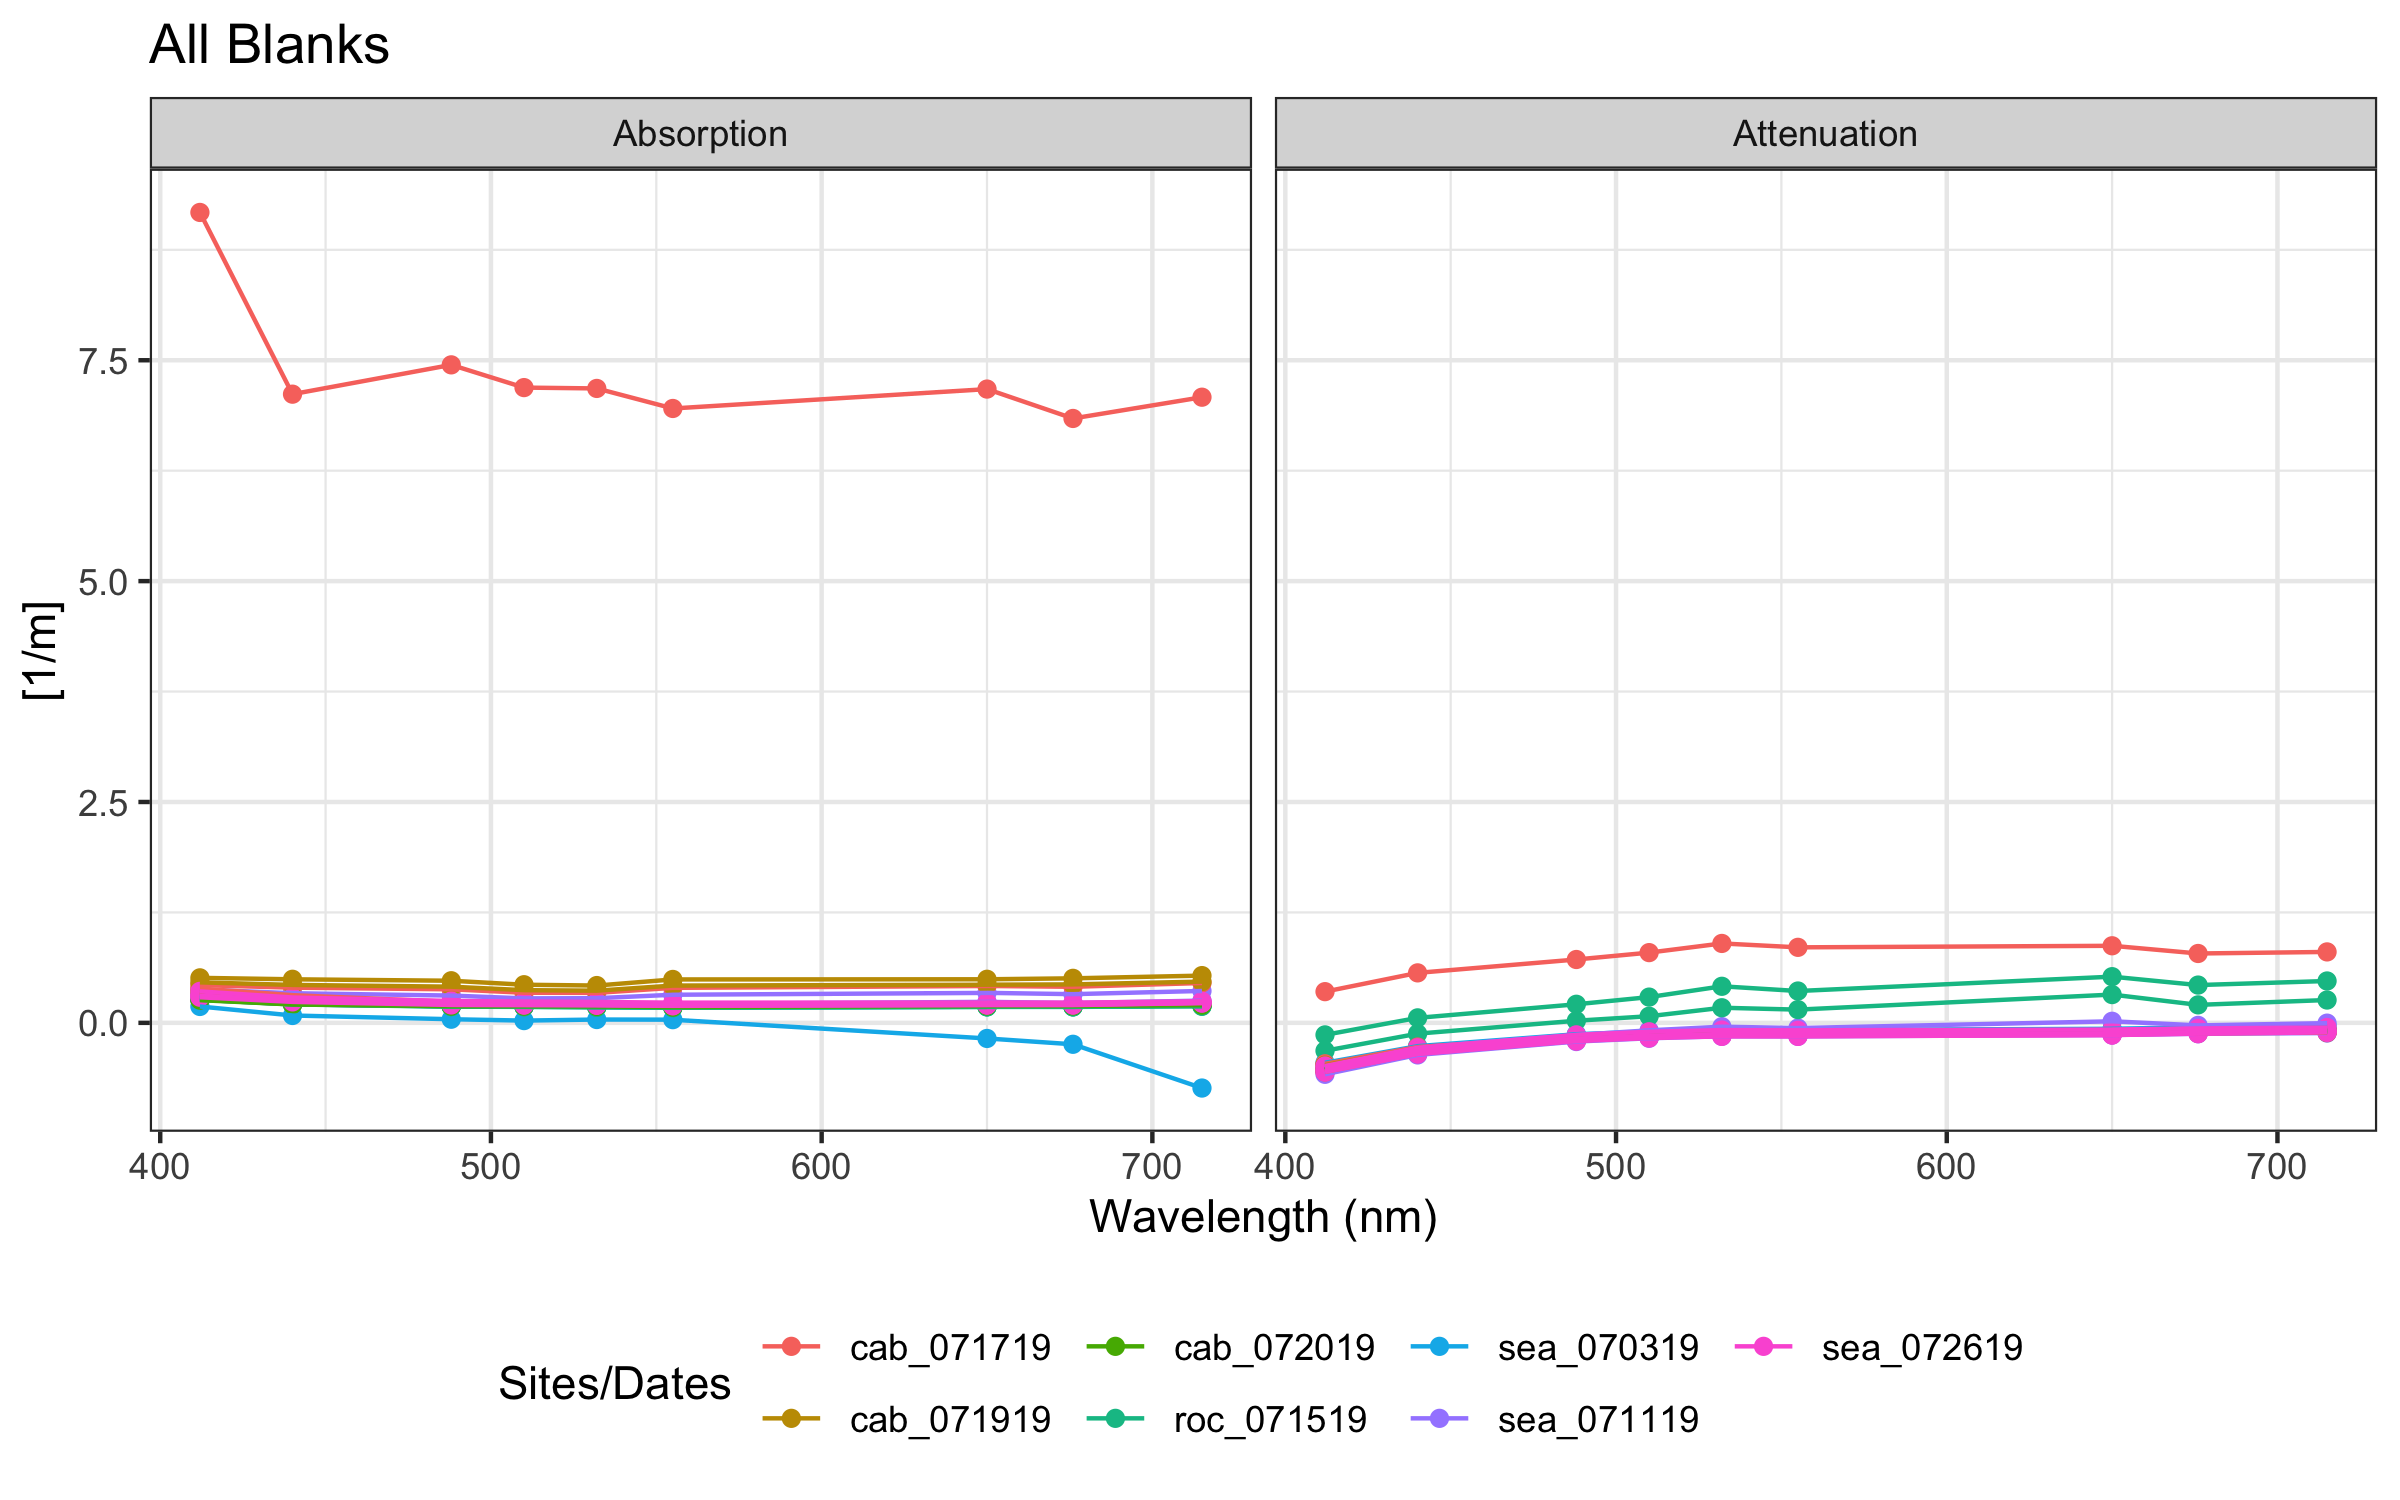

In [39]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(cals, aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="All Blanks")

In [40]:
unique(cals$Site_Date)

[1] "sea_070319" "sea_071119" "roc_071519" "cab_071719" "cab_071919"
[6] "cab_072019" "sea_072619"

In [48]:
cals_adj <- cals %>% filter(!(Site_Date %in% c('cab_071719','sea_070319')))

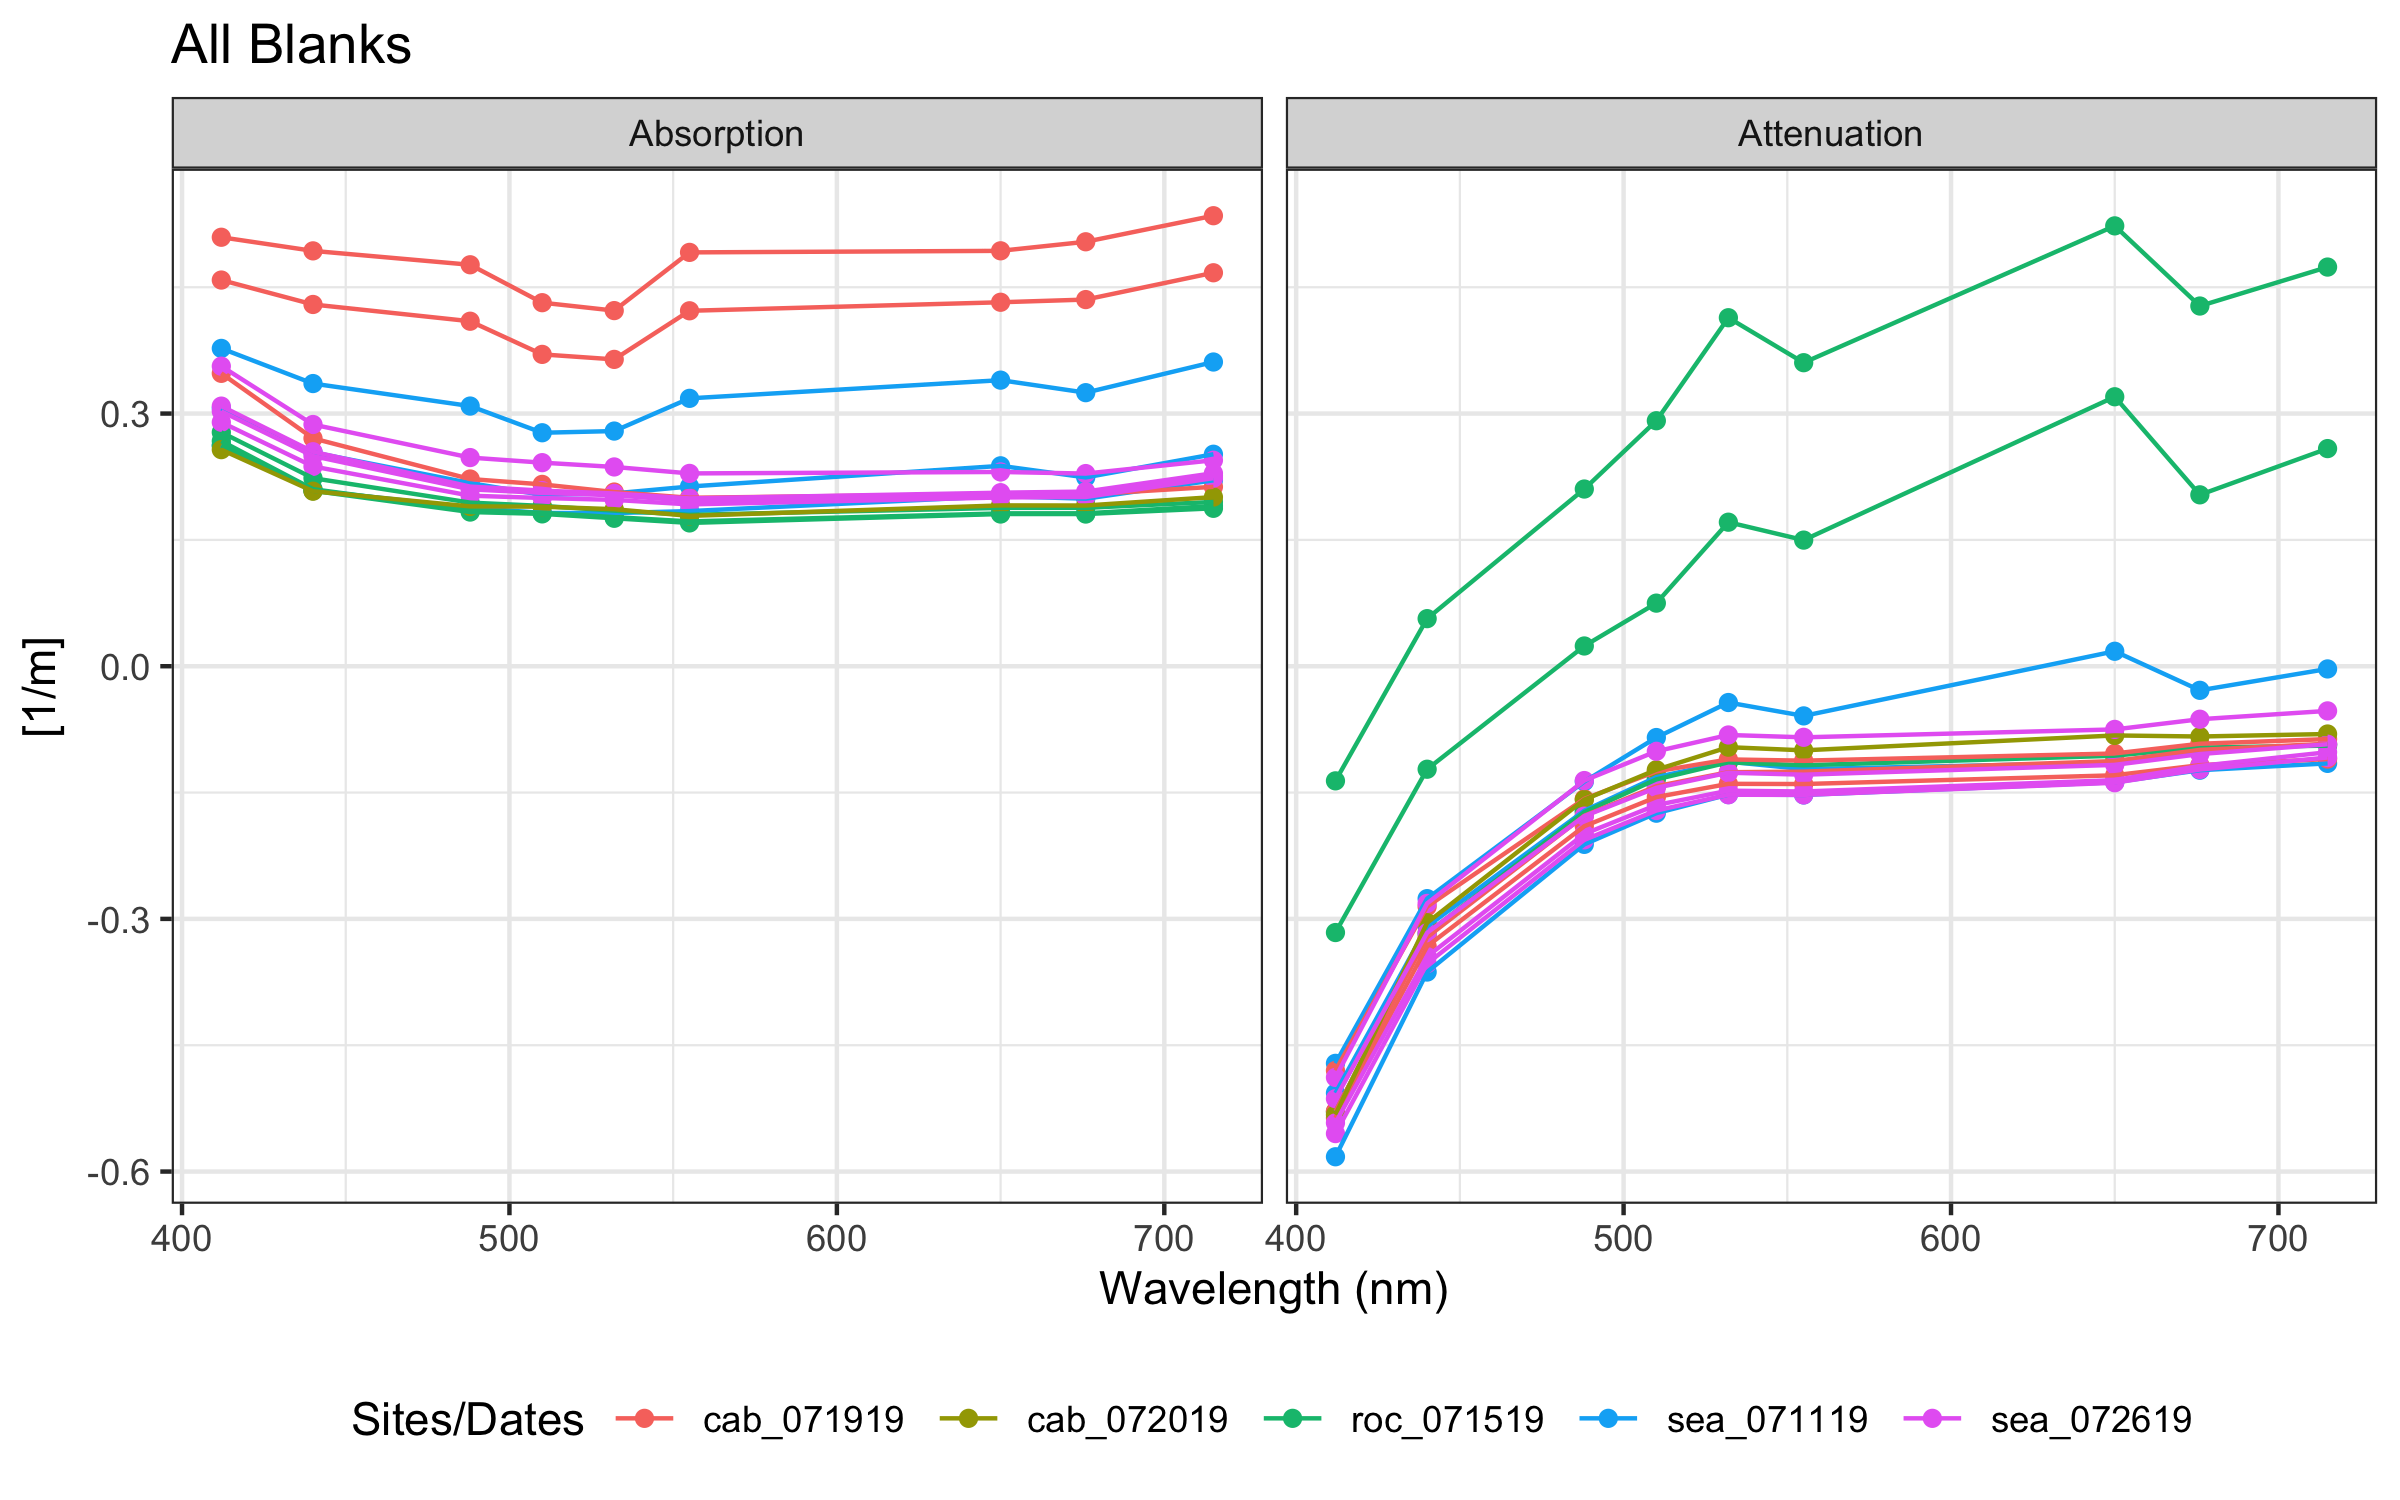

In [49]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(cals_adj, aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="All Blanks")

In [ ]:
cals_adj %>%
        filter(Site_Date == "sea_072619") %>%
        group_by(wl, Analysis_Type_2) %>%
        summarize(mymeans)

In [52]:
unique(cals_adj$ID[cals_adj$Site_Date=="sea_072619"])

[1] AC9_072619_sea_cal_a_1_T24_0 AC9_072619_sea_cal_a_2_T24_6
[3] AC9_072619_sea_cal_a_3_T25_0 AC9_072619_sea_cal_a_4_T24_8
[5] AC9_072619_sea_cal_c_1_T24_0 AC9_072619_sea_cal_c_2_T24_6
[7] AC9_072619_sea_cal_c_3_T25_0 AC9_072619_sea_cal_c_4_T24_8
190 Levels: AC9_070319_sea_cal_a_0_T24_0 ... AC9_072619_sea_cal_c_4_T24_8

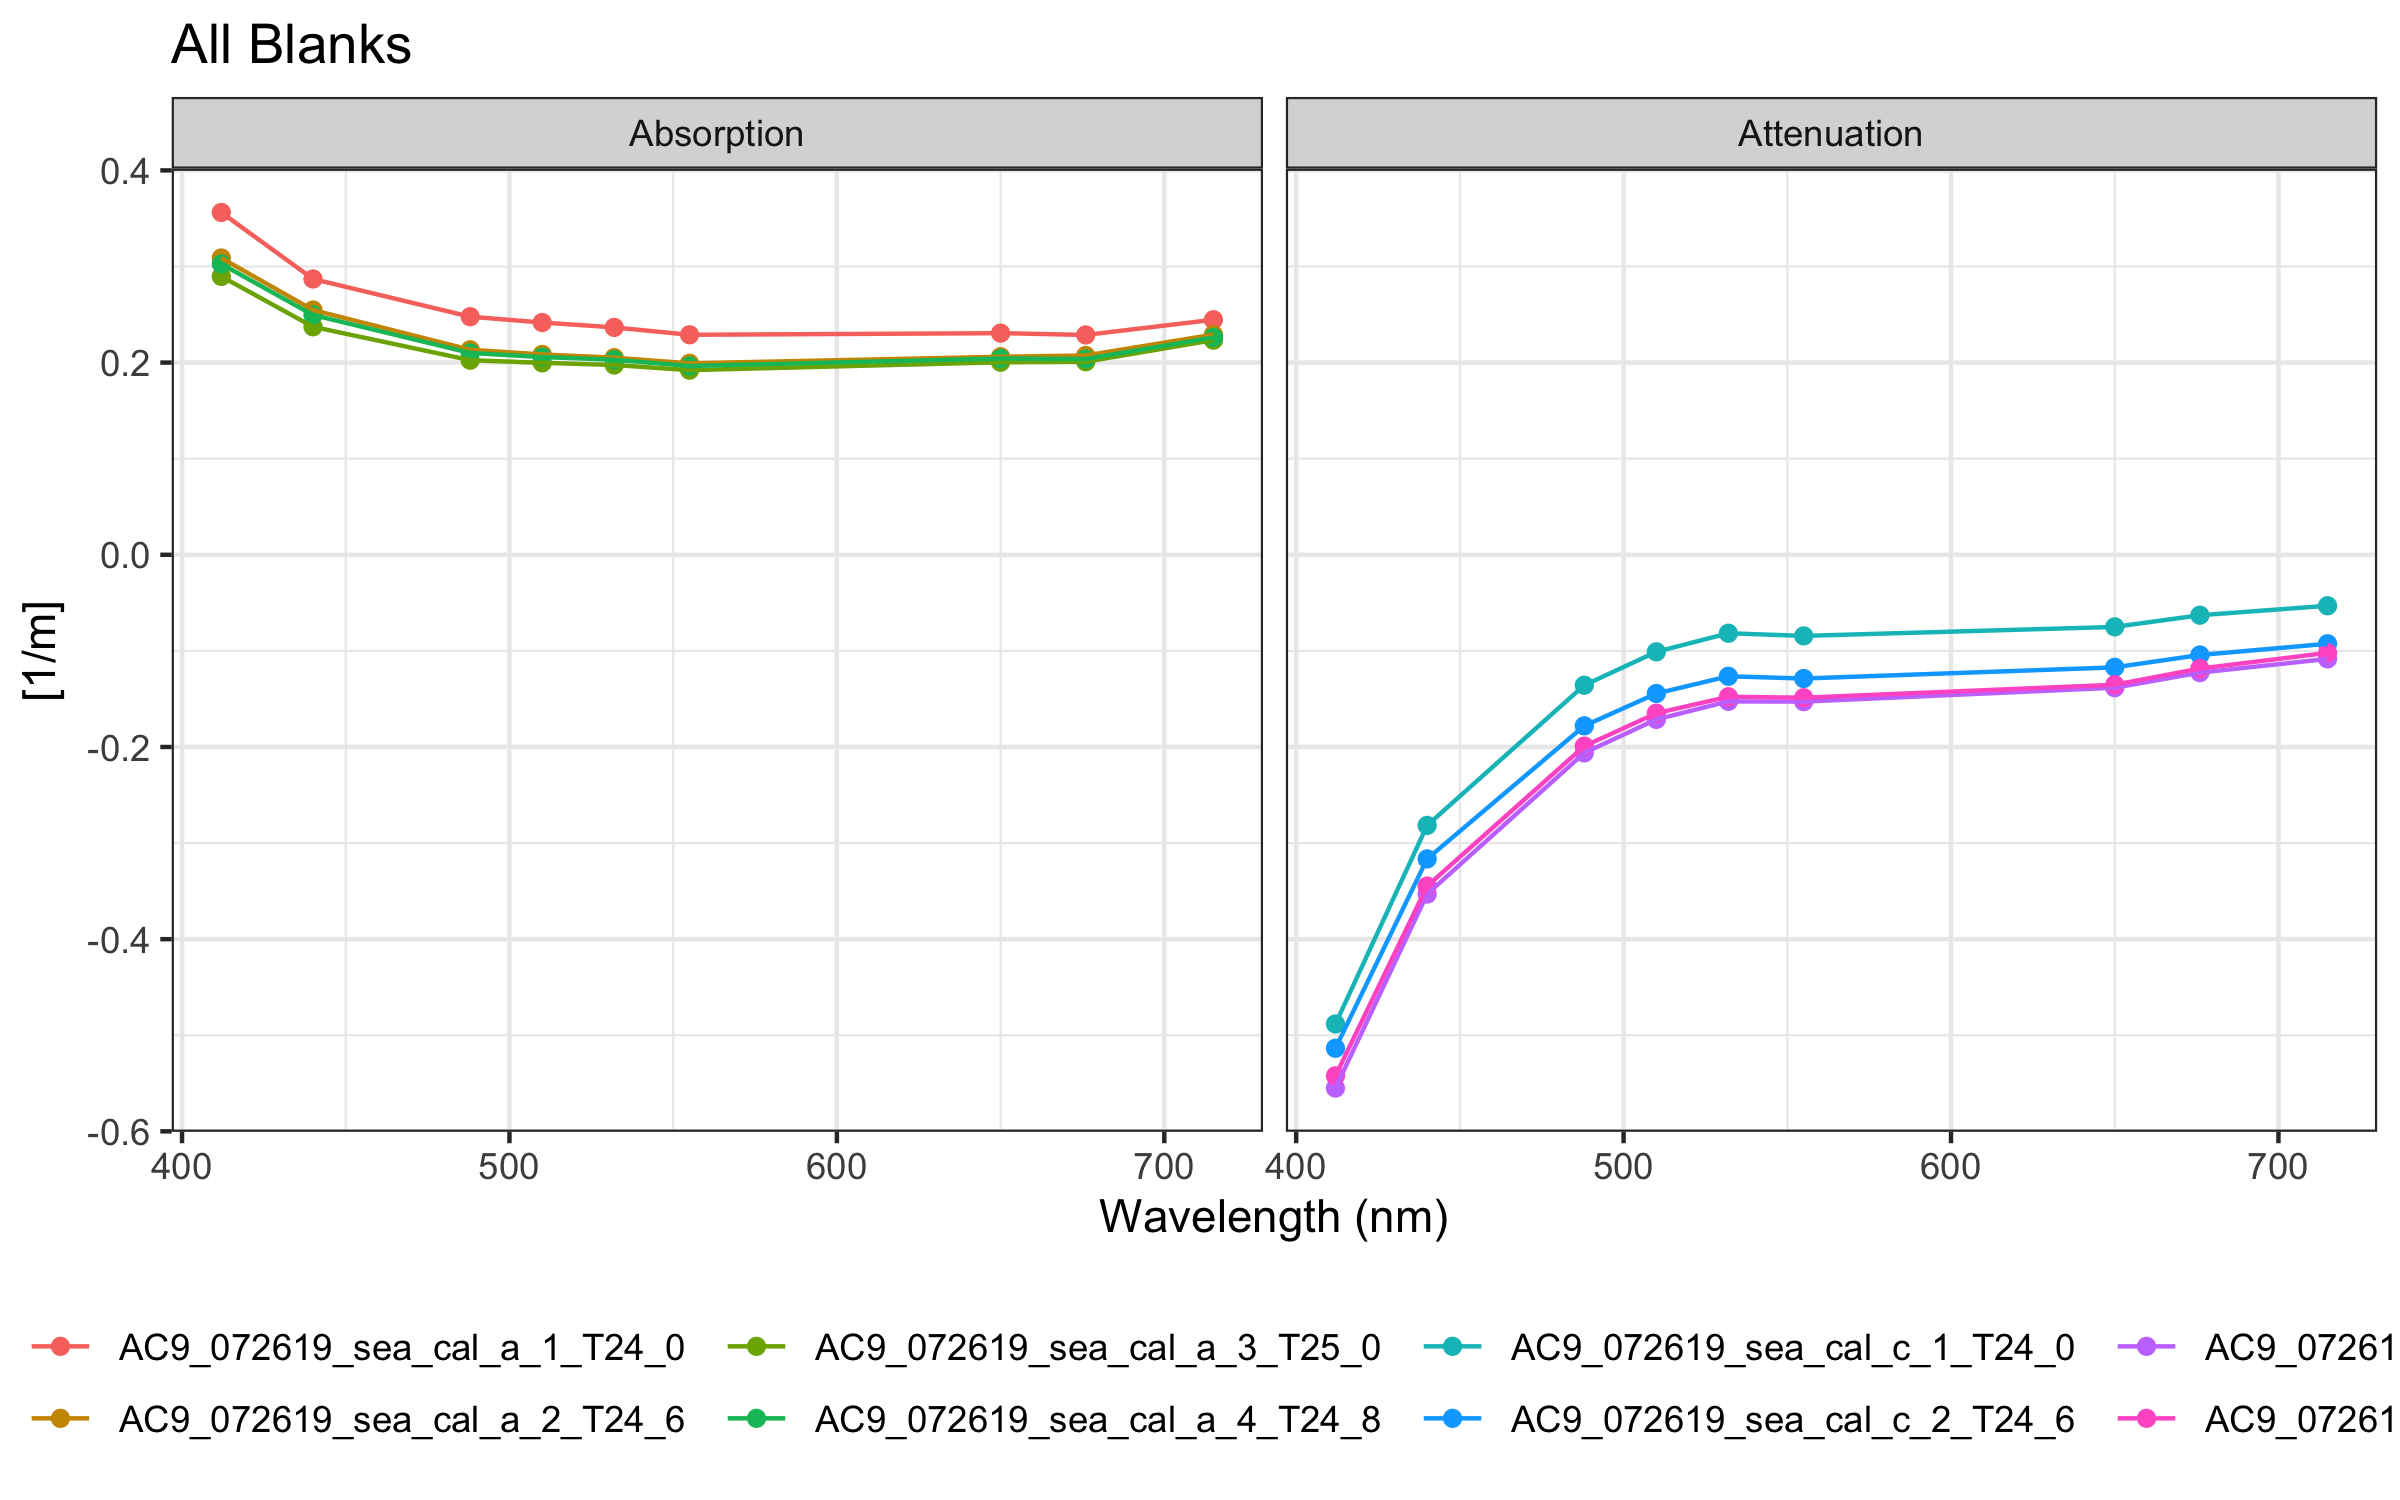

In [50]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(cals_adj[cals_adj$Site_Date=="sea_072619",], aes(x=wl, y=mean, color=ID, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="All Blanks")

In [7]:
df$Site_Date <- with(df, paste(Site,Date,sep="_"))

In [8]:
milliq <- df[df$Site %in% c('sea','fai'),]

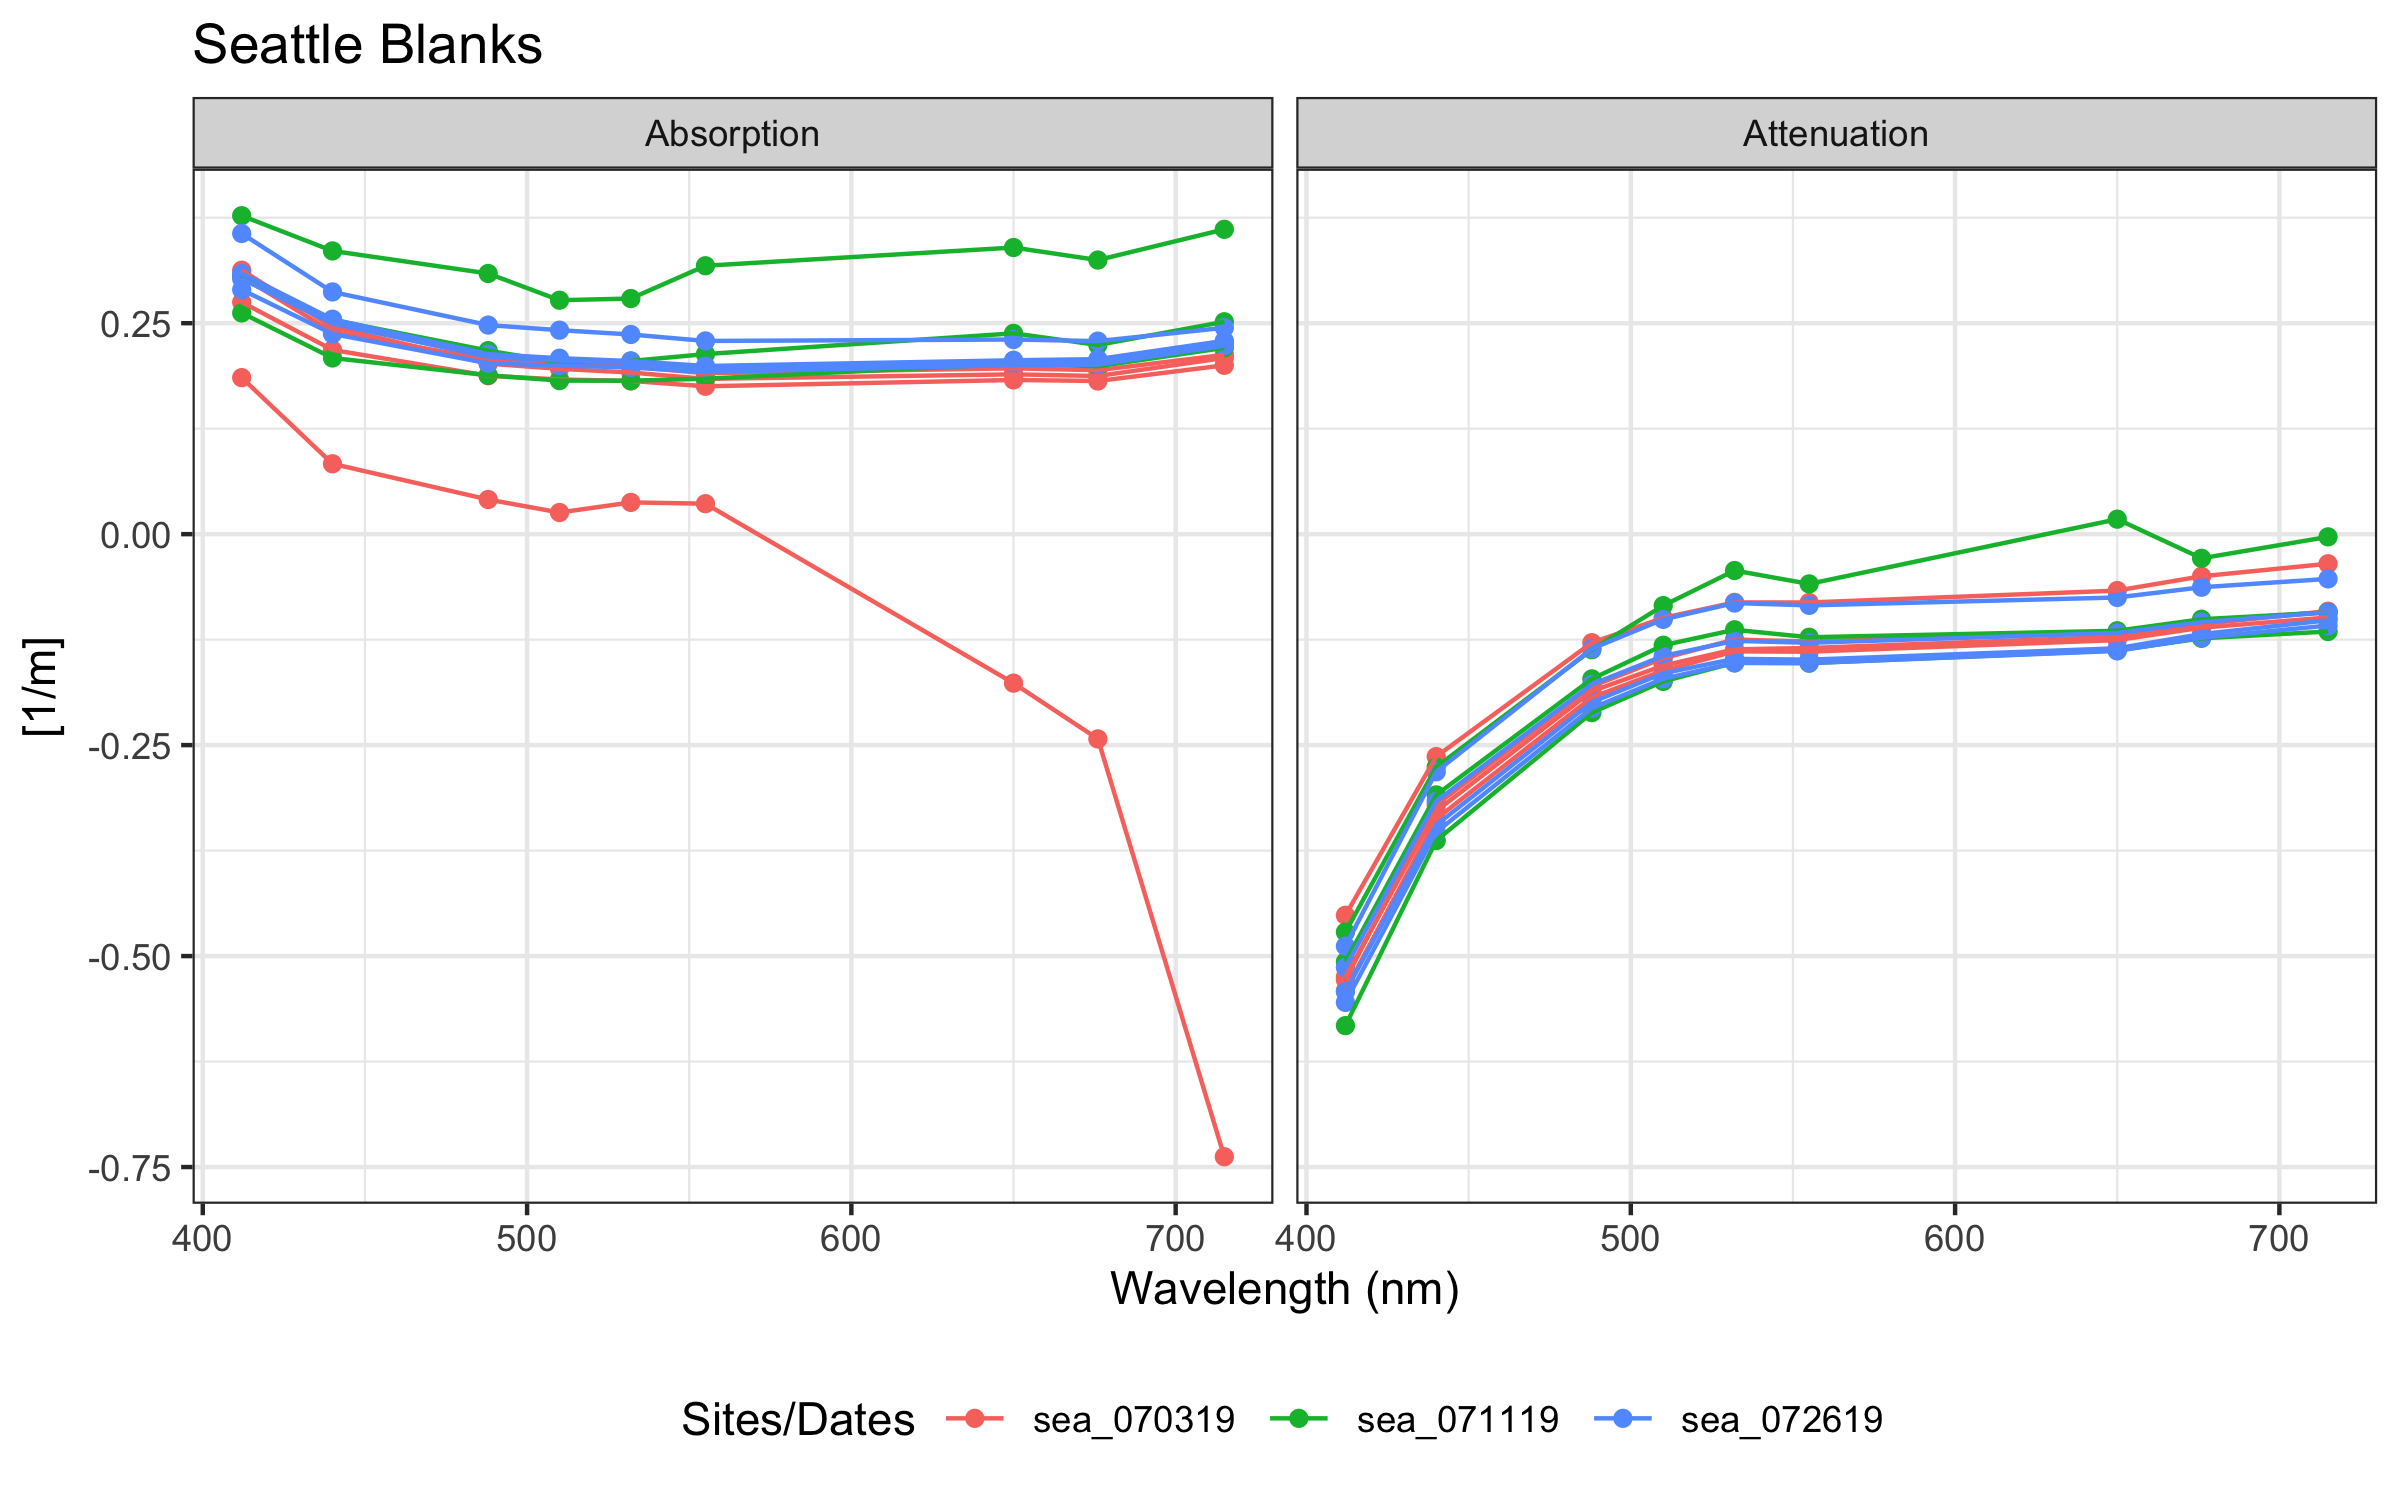

In [20]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(milliq[milliq$Sample_Type=='cal',], aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Seattle Blanks")

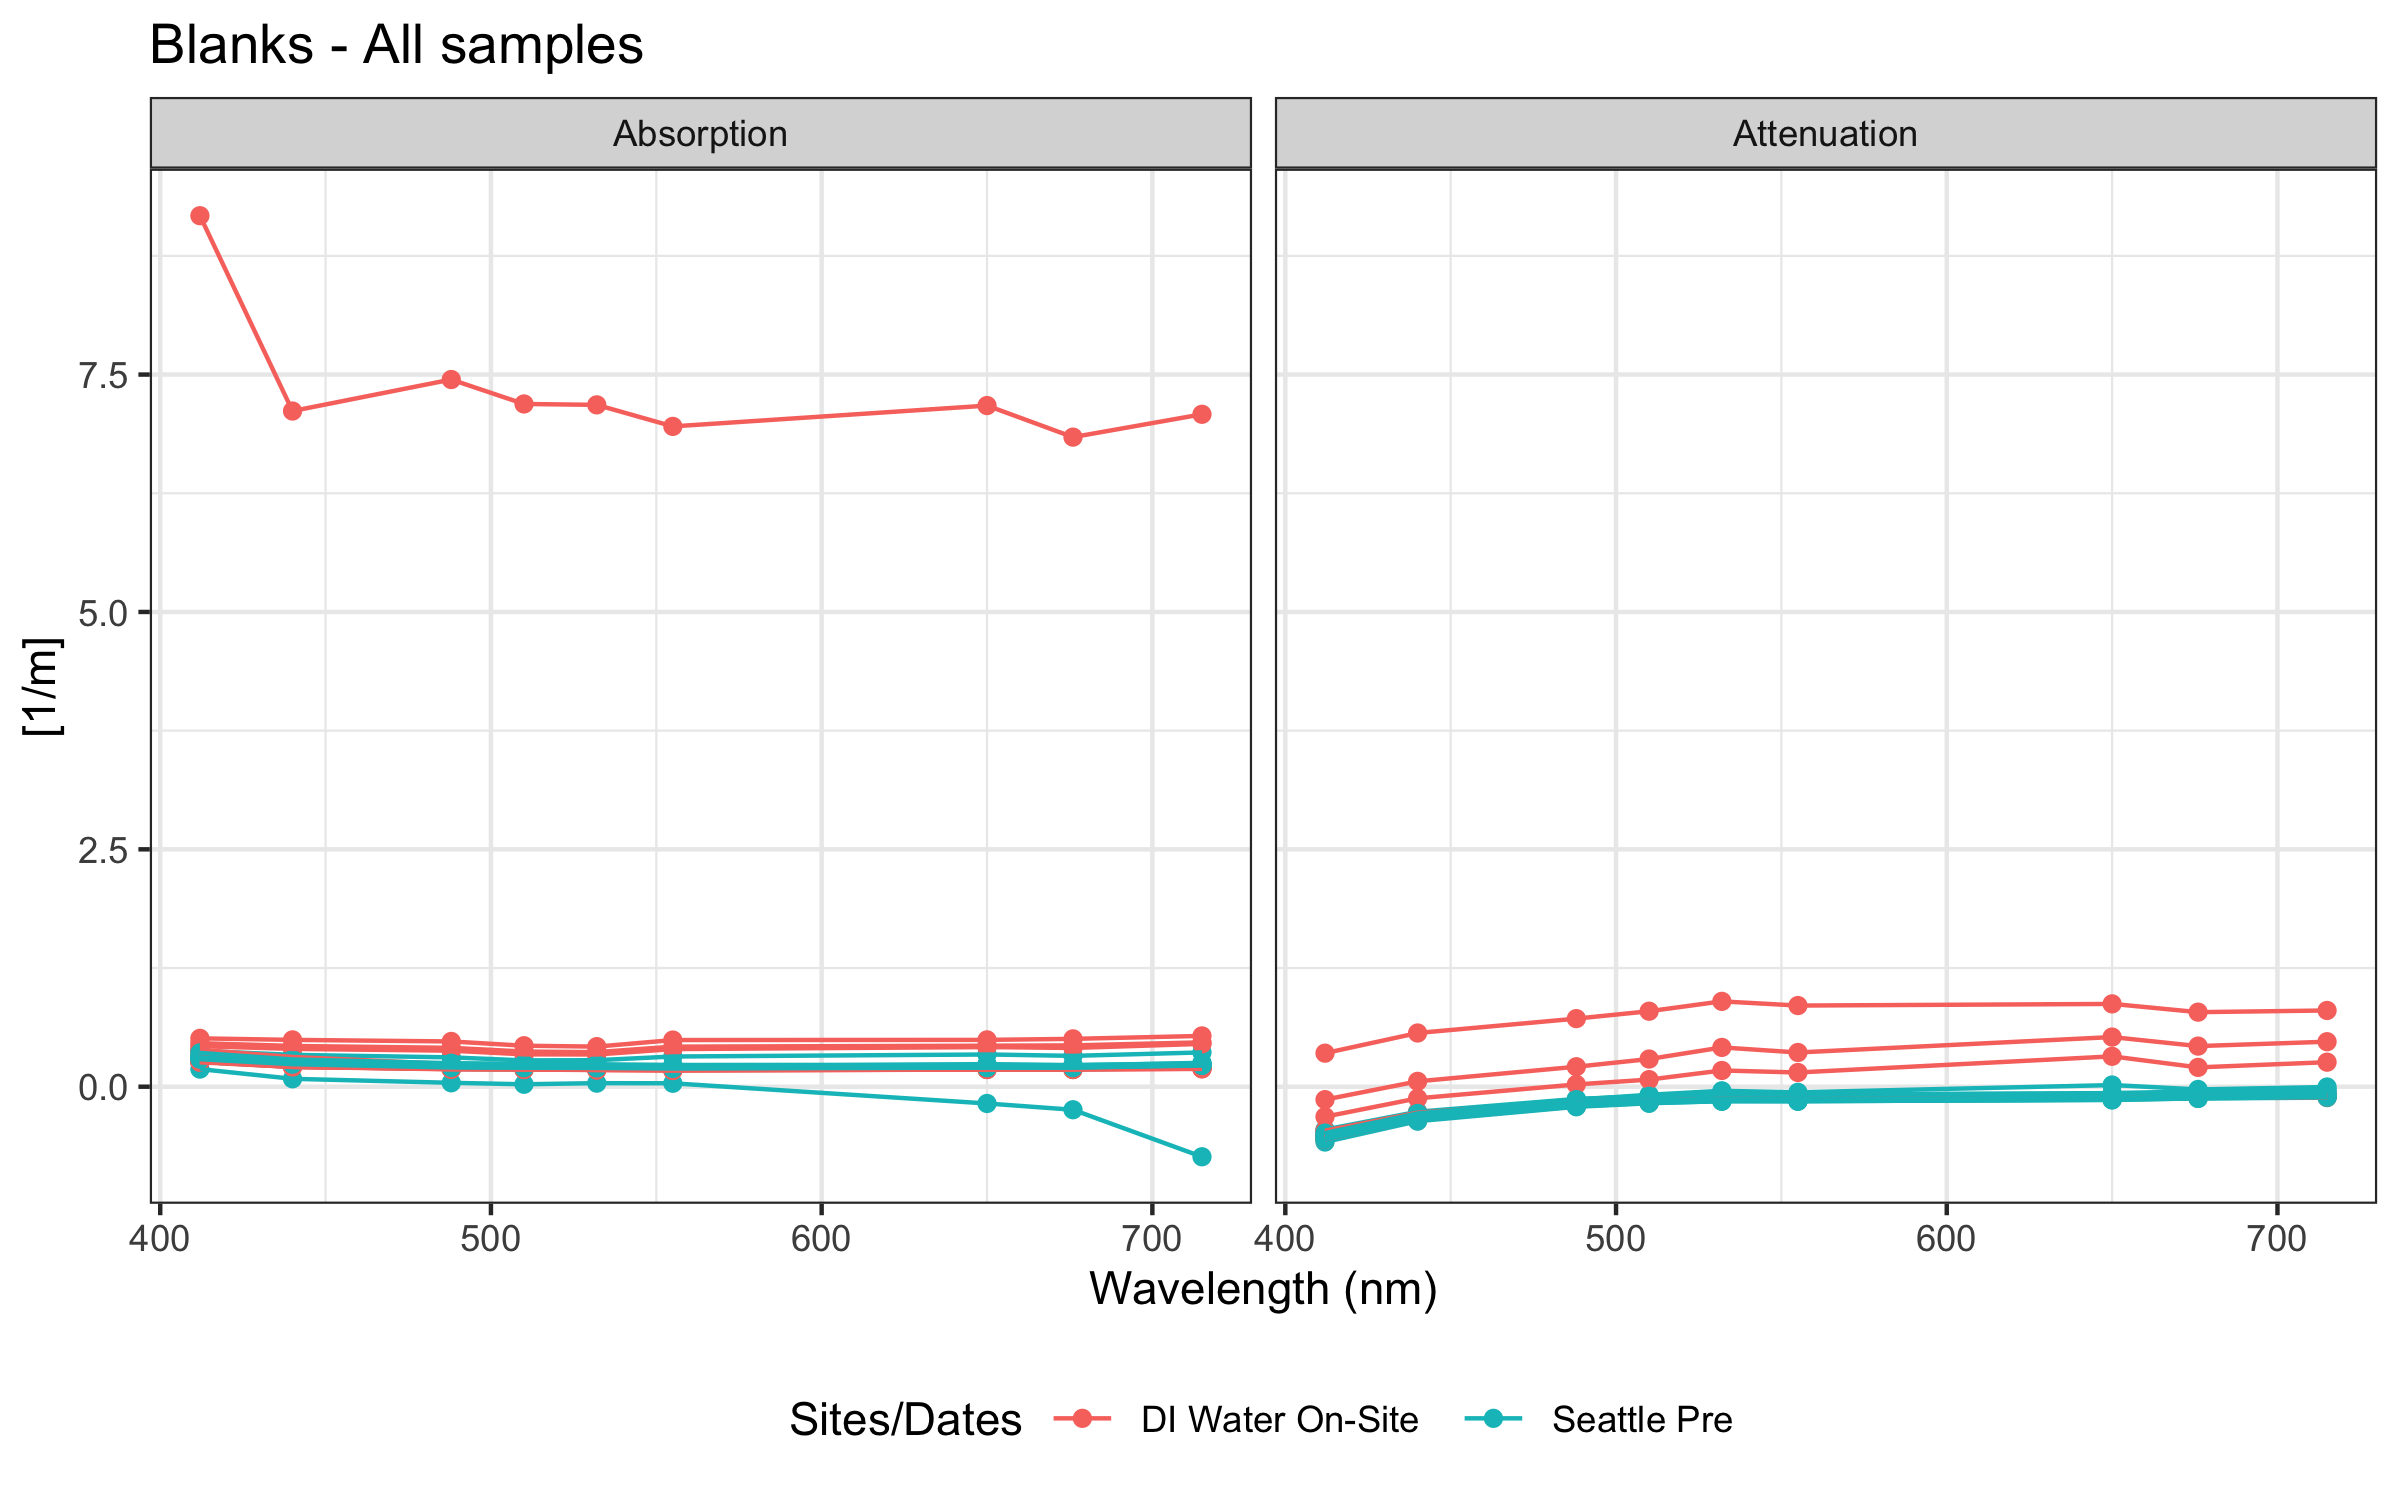

In [10]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(df[df$Sample_Type=='cal',], aes(x=wl, y=mean, color=milliq, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - All samples")

In [17]:
df

wl,mean,Temp,ID,Site,Sample_Type,Analysis_Type,Date,Rep,Analysis_Type_2,milliq,Site_Date
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,<int>,<chr>,<chr>,<chr>
412,0.27491115,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319
440,0.21834458,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319
488,0.18770960,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319
510,0.18332975,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319
532,0.18155702,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319
555,0.17522453,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319
650,0.18278028,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319
676,0.18148229,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319
715,0.20007168,24.0,AC9_070319_sea_cal_a_0_T24_0,sea,cal,a,070319,0,Absorption,Seattle Pre,sea_070319


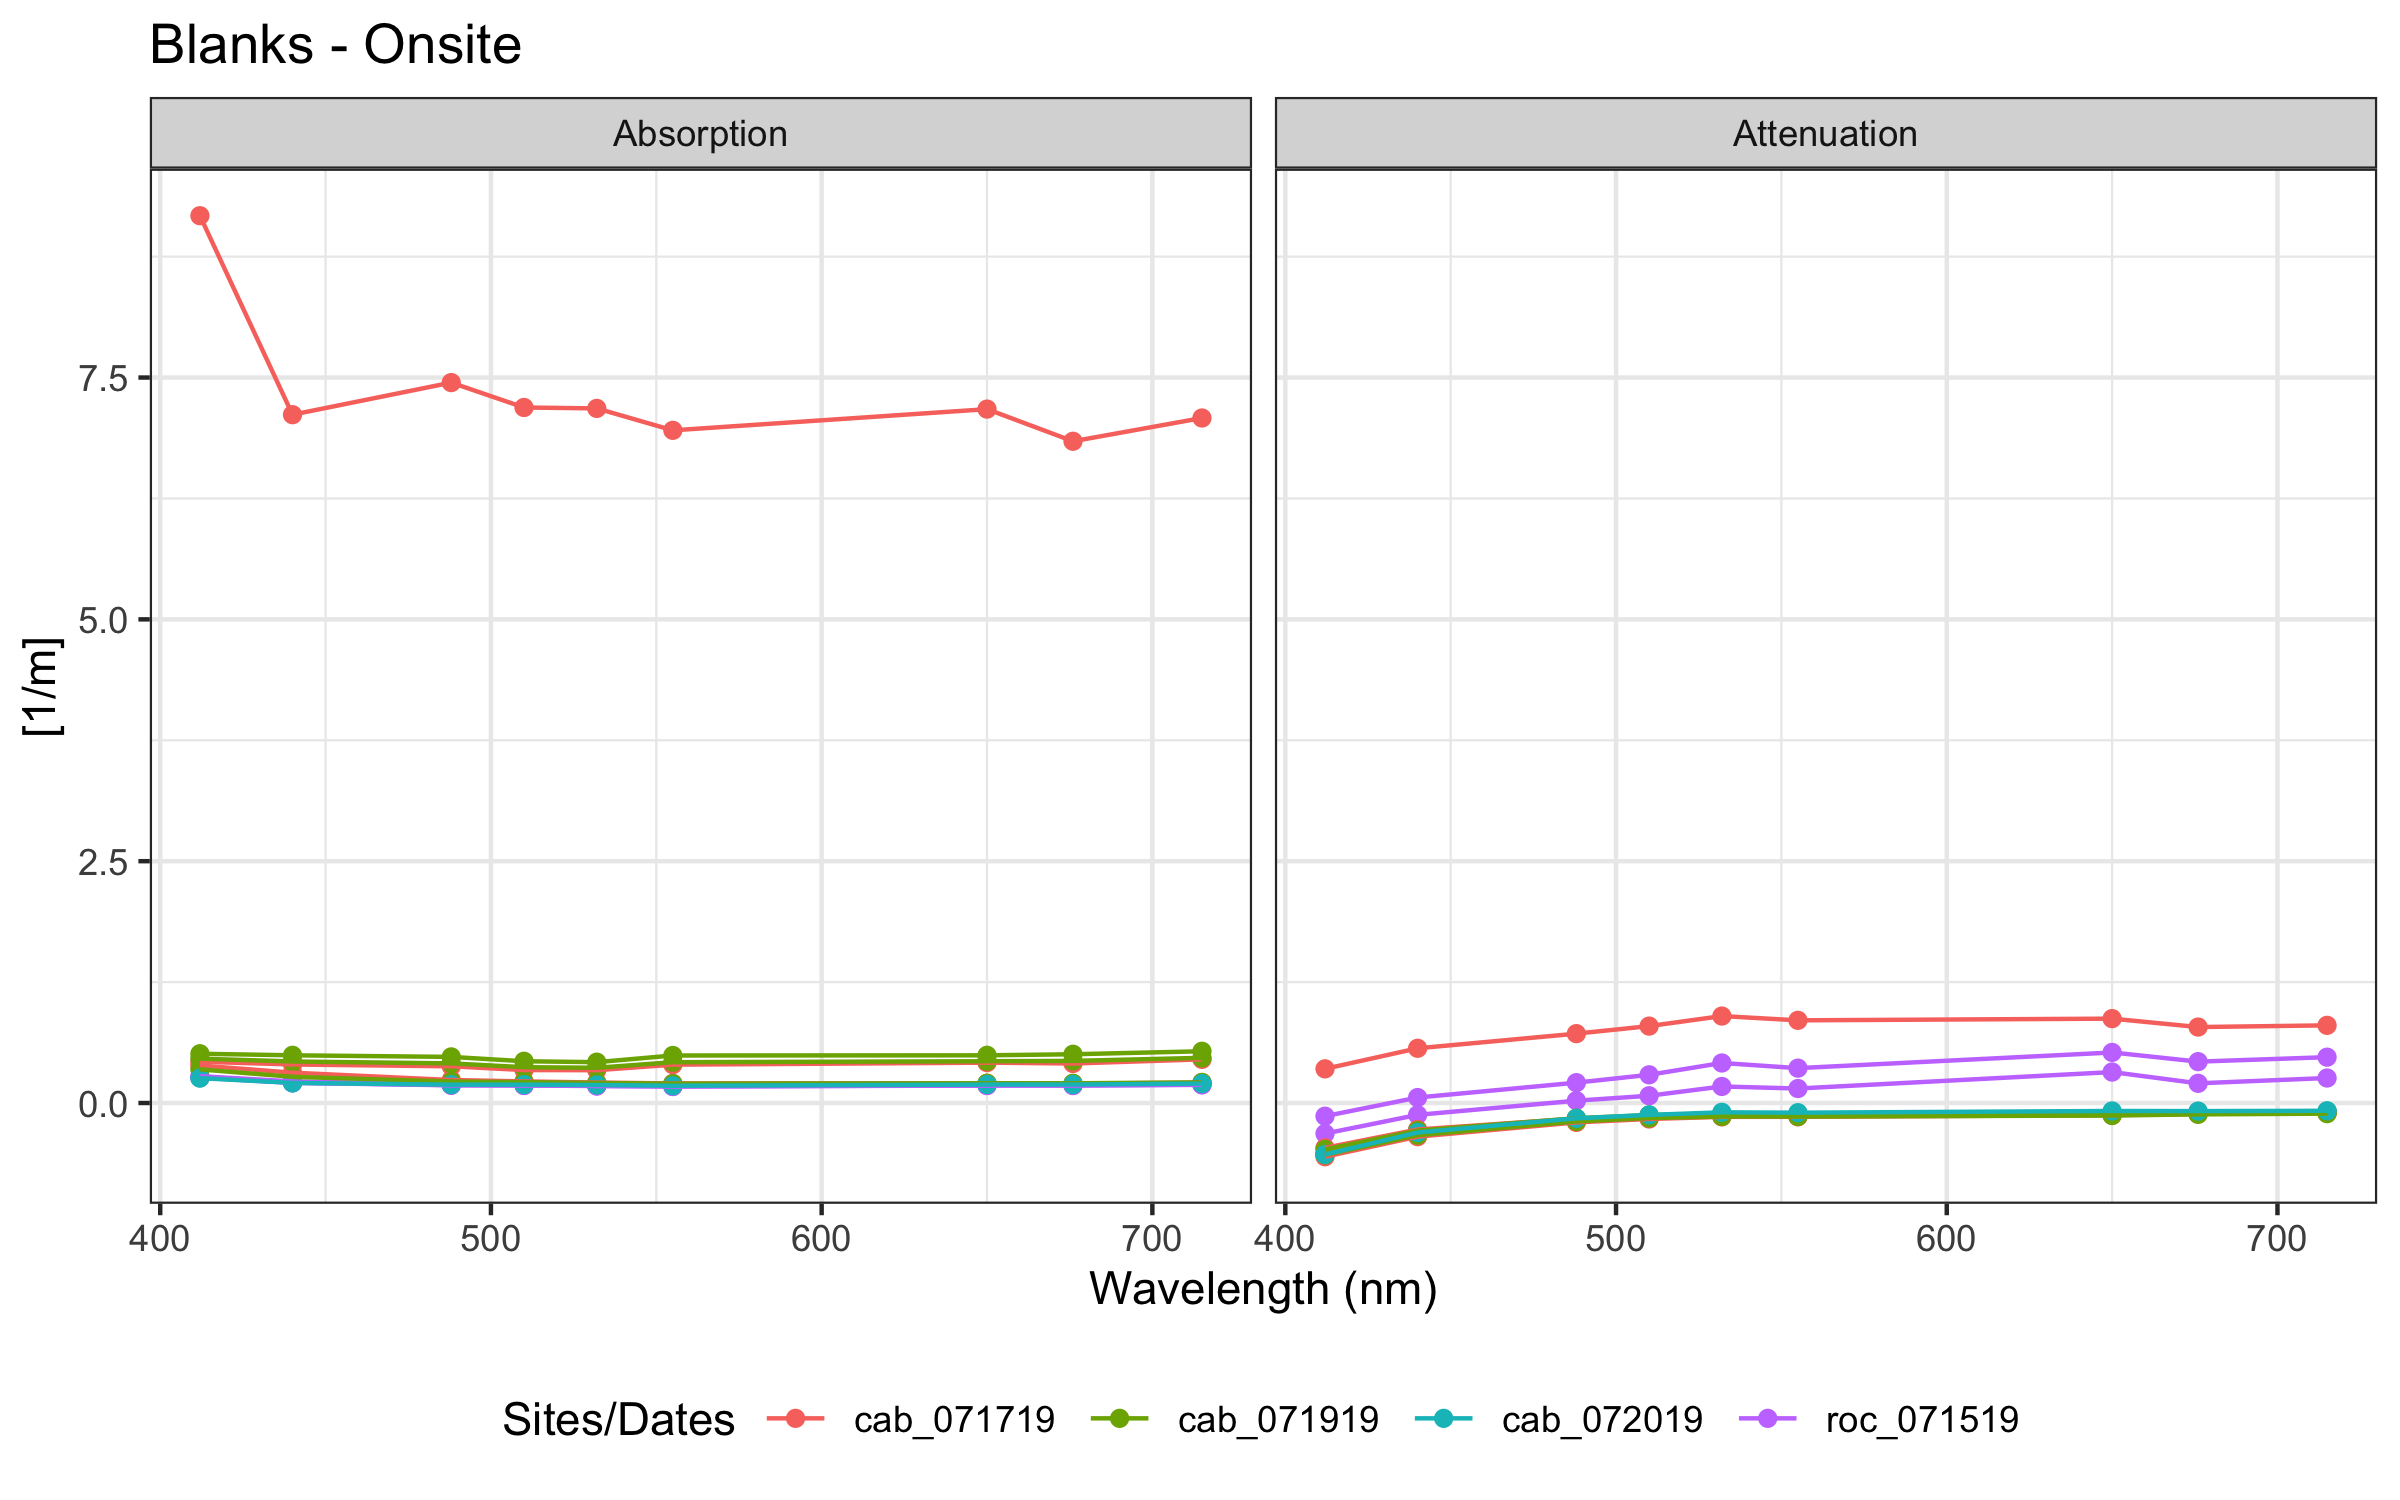

In [16]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(df[df$Sample_Type=='cal'&!(df$Site %in% c('sea','fai')),], aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - Onsite")

In [12]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
p <- ggplot(milliq[milliq$Sample_Type=='cal',], aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    geom_text(aes(label=Rep)) +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - MilliQ Samples Only")

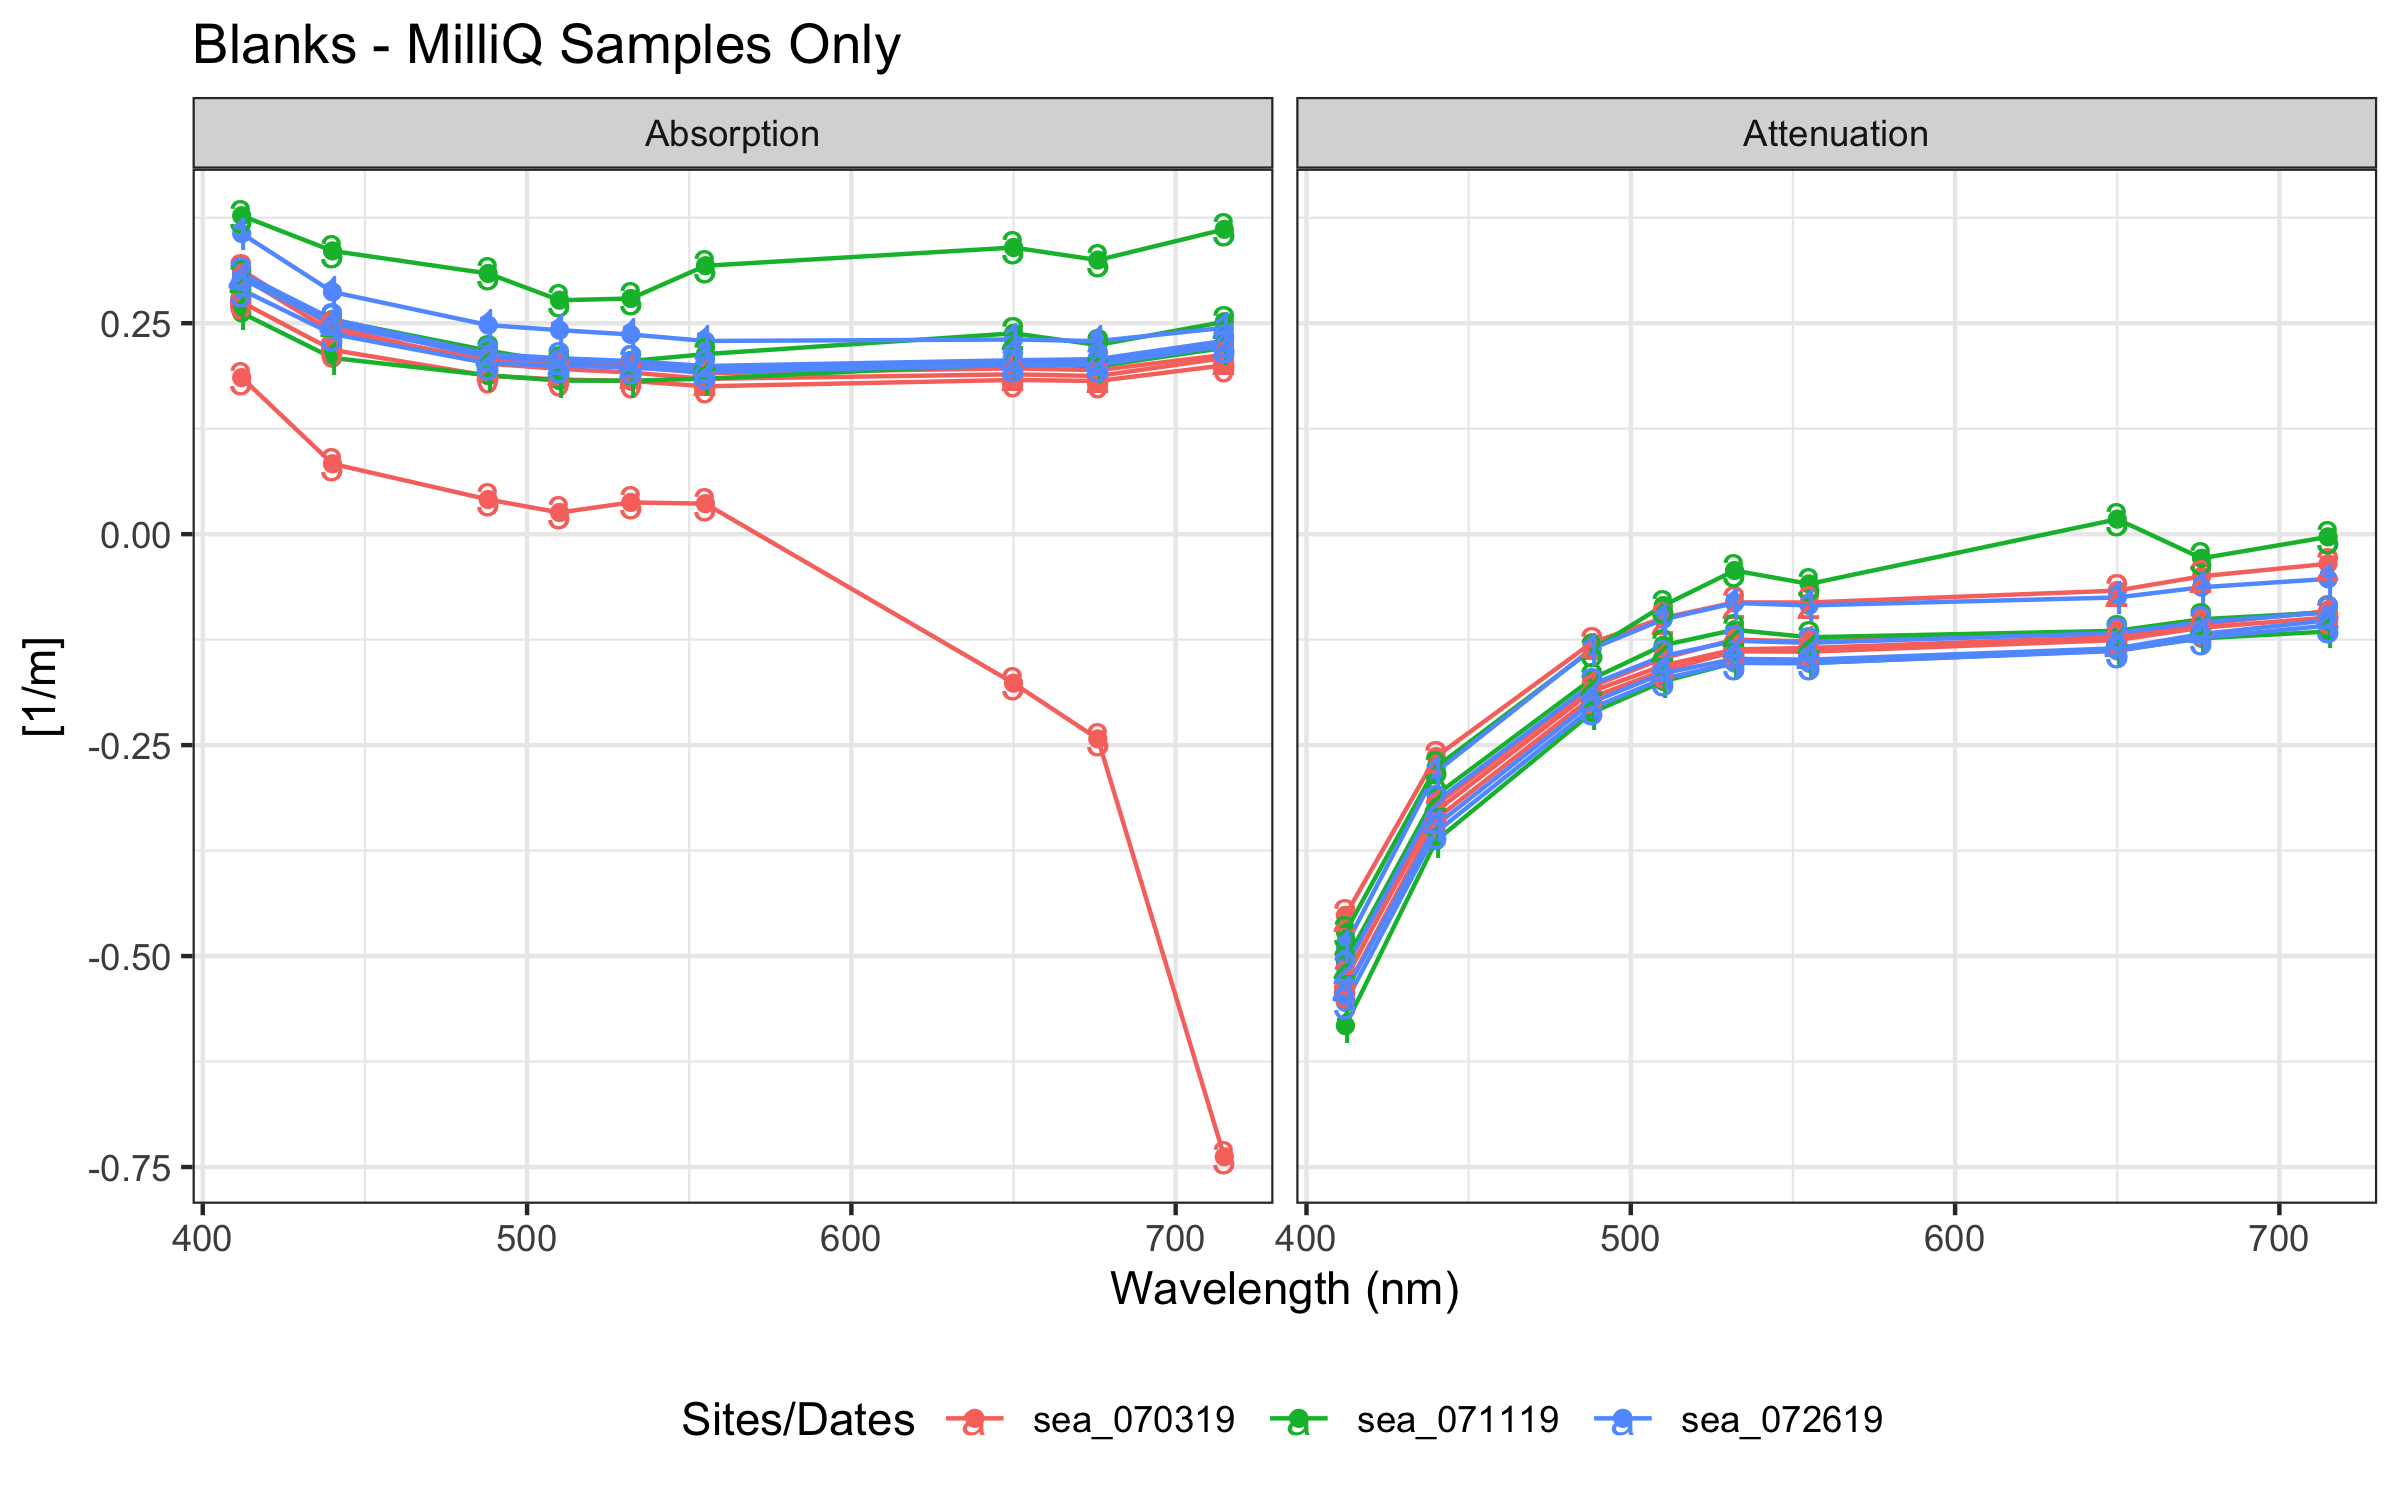

In [13]:
p

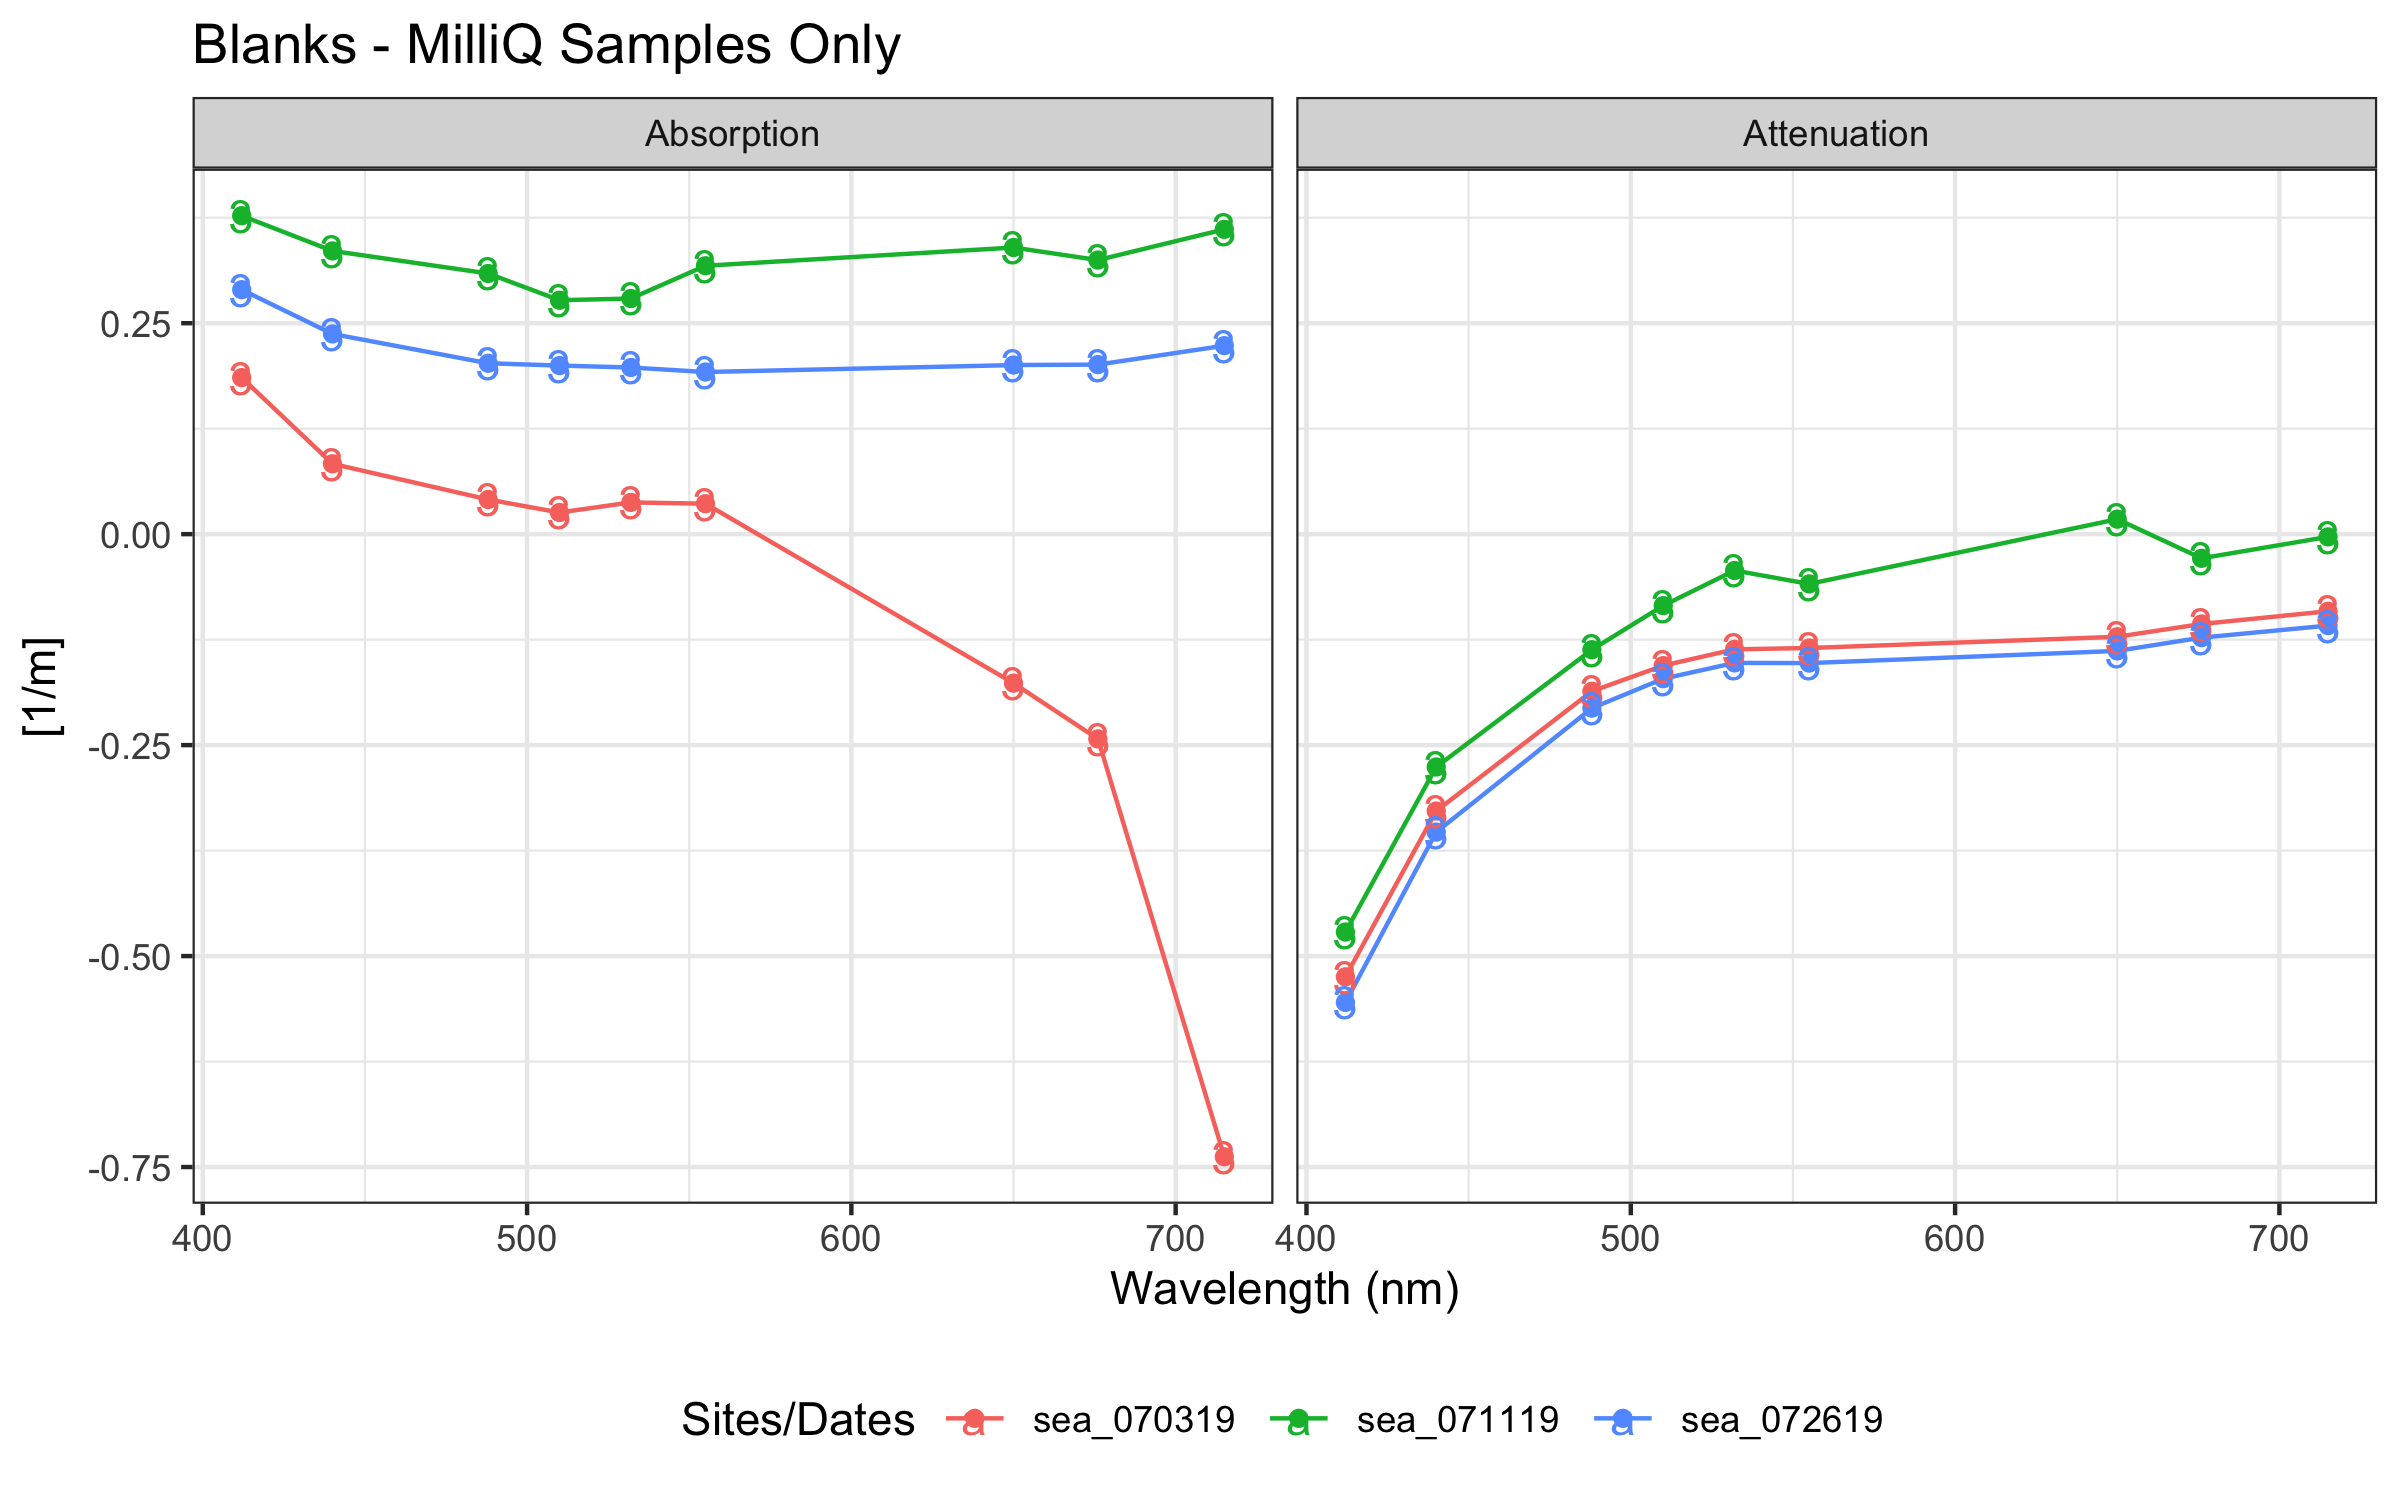

In [14]:
ggplot(milliq[milliq$Sample_Type=='cal'&milliq$Rep==3,], aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    geom_text(aes(label=Rep)) +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - MilliQ Samples Only")

### So, who is the cleanest of them all?

In [15]:
unique(milliq$ID[milliq$Site=='sea'&milliq$Sample_Type=='cal'&milliq$Date=='070718'&milliq$Rep==3])

factor(0)
190 Levels: AC9_070319_sea_cal_a_0_T24_0 ... AC9_072619_sea_cal_c_4_T24_8